In [ ]:
* [pandas] (https://pandas.pydata.org/)
* [scikit-learn] (https://scikit-learn.org/stable/)
* [matplotlib] (https://matplotlib.org/)
* [mglearn]

# 0. 노트 설정

In [31]:
%config InlineBackend.figure_format='retina'

In [33]:
from preamble import *

## 아래는 잘 봐두세요
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import mglearn

# 데이터 적재

In [34]:
iris = load_iris()
iris.keys()
iris['target']
iris['target_names']

# pandas 로 합쳐야 됨

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 살펴보기
- size(열/행 갯수)
- 관측자료
- 타입(df.info())

붓꽃 데이터는 다 정제된 데이터, 살펴보기는 타이타닉 데이터 정도에서 한다. (정형 데이터)

반환 값은 튜플(ordering)로 나온다. (X_train, y_train | x_test, y_test)

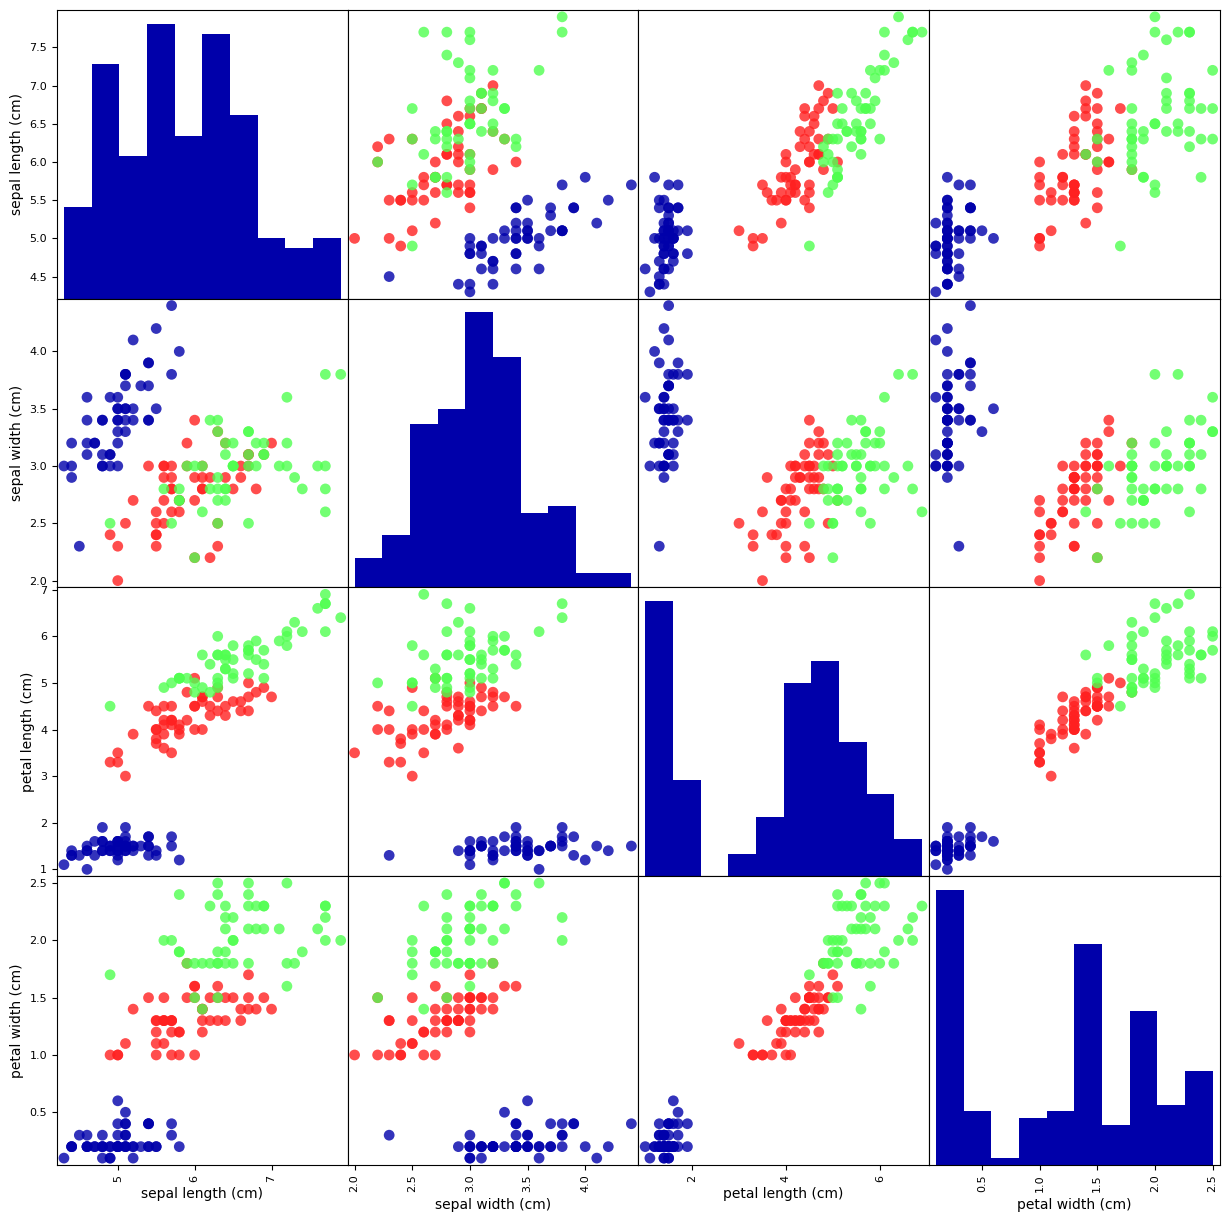

In [36]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
pd.plotting.scatter_matrix(df, c=iris['target'], figsize=(15,15), marker='o', s=60, alpha=.8, cmap=mglearn.cm3);

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], random_state=42) # X 는 문제, y 는 답안지

In [ ]:
pd.DataFrame(X_train, columns=iris['target_names'])

In [8]:
len(X_train), len(X_test)

(112, 38)

## 학습 및 모델

데이터를 적절히 잘라야 한다.

130개로 학습하고 20개로 시험해본다. -> 안 괜찮아. 1. 20문제 미적분만? 2. 학습은 미적분이 없는데 평가는 미적분? (학습, 평가 전단위의 문제 골고루 들어있어야 한다)

X -> Xtrain, Xtest 데이터로 나눠져 나와야 한다.

편향이 들어가면 안되며 "임의로 균등하게" 나와야 한다.

컴퓨터 랜덤은 의사랜덤이라 초기 씨드를 알면 예측 가능: 그래서 그냥 랜덤으로 나누면 된다고 말하면 안된다.

(from sklearn.model_selection import train_test_split 사용해야함)

사이킷런과 텐서플로는 나오는 순서 다르다.

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## 평가 및 검증

In [15]:
y_pred = knn.predict(X_test)
knn.score(X_test, y_test) # overfitting

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

In [3]:
(pd.__version__,
np.__version__,
matplotlib.__version__,
sklearn.__version__)

('2.2.2', '1.26.4', '3.8.4', '1.4.2')

In [ ]:
# 붓꽃 품종 분류

회귀(주식 숫자, 틀리는 건 오차 문제일 것임)나 분류(A집합이야 B집합이야, 주식이 오를까 내릴까, 맞맞 틀틀 맞틀 틀맞 네가지 케이스 따라 다름) 문제

면접 때 물어보는 건 대부분 지도학습

> 분류: 꽃잎 + 꽃받침 => 품종

품종이 두개면 이진분류

주식 오를까 내릴까: 현상 유지면 내린다(안 오르면)로 답변, 오르는 것에 관심있으면 오르지 않으면 다 내린 것이다.

첫번째 import 는 맨 상단에 한다

